In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("loan_data_set.xlsx")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y


In [50]:
df.shape

(614, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,6.140000e+02,592.000000,600.00000,564.000000
mean,5403.459283,1.868240e+07,146.412162,342.00000,0.842199
std,6109.041673,4.030156e+08,85.587325,65.12041,0.364878
min,150.000000,0.000000e+00,9.000000,12.00000,0.000000
25%,2877.500000,0.000000e+00,100.000000,360.00000,1.000000
50%,3812.500000,1.221000e+03,128.000000,360.00000,1.000000
75%,5795.000000,2.324000e+03,168.000000,360.00000,1.000000
max,81000.000000,9.858000e+09,700.000000,480.00000,1.000000


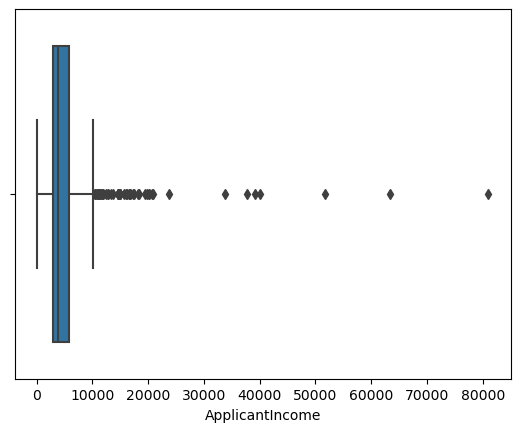

In [5]:
sns.boxplot(x = "ApplicantIncome", data=df)
plt.show()

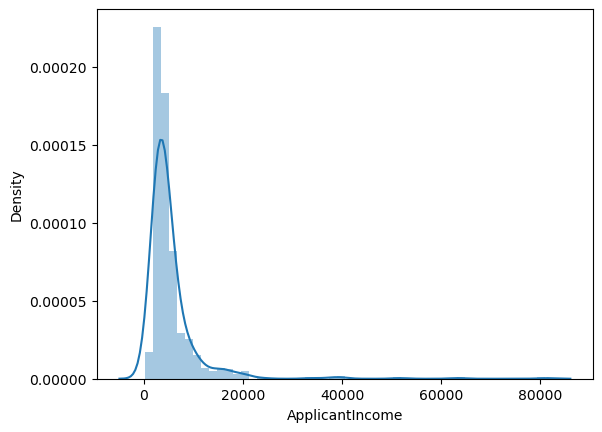

In [6]:
sns.distplot(df["ApplicantIncome"])
plt.show()

### How to Remove Outliers using IQR

In [7]:
df_iqr = pd.read_excel("loan_data_set.xlsx")
df_iqr.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y


In [8]:
df_iqr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,6.140000e+02,592.000000,600.00000,564.000000
mean,5403.459283,1.868240e+07,146.412162,342.00000,0.842199
std,6109.041673,4.030156e+08,85.587325,65.12041,0.364878
min,150.000000,0.000000e+00,9.000000,12.00000,0.000000
25%,2877.500000,0.000000e+00,100.000000,360.00000,1.000000
50%,3812.500000,1.221000e+03,128.000000,360.00000,1.000000
75%,5795.000000,2.324000e+03,168.000000,360.00000,1.000000
max,81000.000000,9.858000e+09,700.000000,480.00000,1.000000


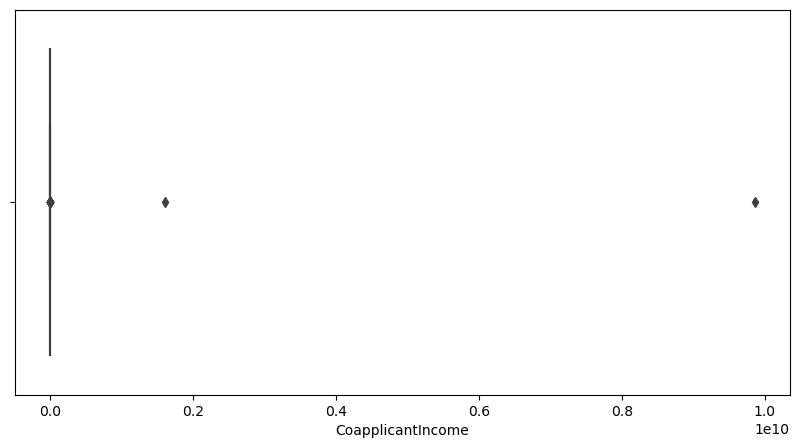

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "CoapplicantIncome", data=df_iqr)
plt.show()

In [10]:
df_iqr.shape

(614, 13)

In [11]:
q1 = df_iqr["CoapplicantIncome"].quantile(0.25)
q3 = df_iqr["CoapplicantIncome"].quantile(0.75)
q3

2324.0

In [12]:
IQR = q3-q1

In [13]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

In [14]:
min_range,max_range

(-3486.0, 5810.0)

In [15]:
New_df_iqr = df_iqr[df_iqr["CoapplicantIncome"]<=max_range]

In [16]:
New_df_iqr.shape

(594, 13)

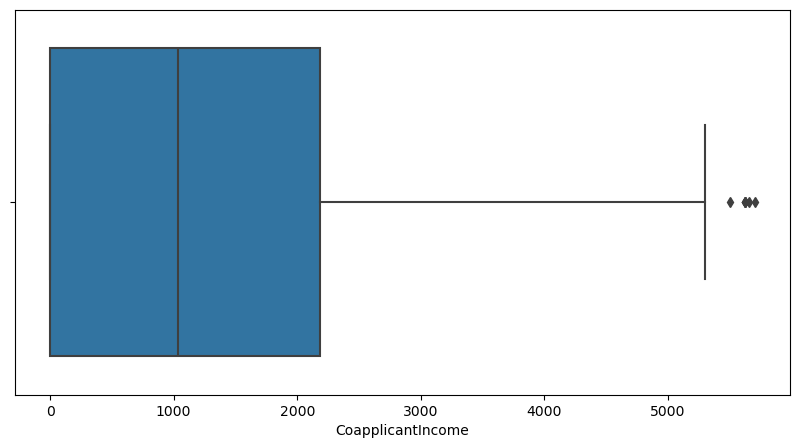

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "CoapplicantIncome", data=New_df_iqr)
plt.show()

In [18]:
New_df_iqr.shape

(594, 13)

### Remove Outliers Using Z_score

In [19]:
df_zscore = pd.read_excel("loan_data_set.xlsx")
df_zscore.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y


In [20]:
df_zscore.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df_zscore.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,6.140000e+02,592.000000,600.00000,564.000000
mean,5403.459283,1.868240e+07,146.412162,342.00000,0.842199
std,6109.041673,4.030156e+08,85.587325,65.12041,0.364878
min,150.000000,0.000000e+00,9.000000,12.00000,0.000000
25%,2877.500000,0.000000e+00,100.000000,360.00000,1.000000
50%,3812.500000,1.221000e+03,128.000000,360.00000,1.000000
75%,5795.000000,2.324000e+03,168.000000,360.00000,1.000000
max,81000.000000,9.858000e+09,700.000000,480.00000,1.000000


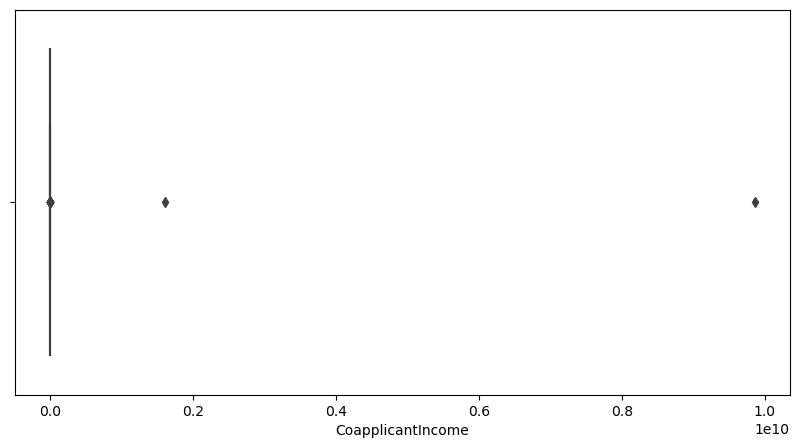

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "CoapplicantIncome", data=df_zscore)
plt.show()

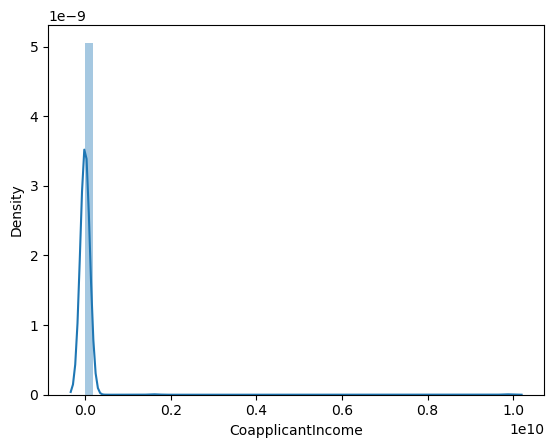

In [23]:
sns.distplot(df_zscore["CoapplicantIncome"])
plt.show()

In [24]:
Min_range = df_zscore["CoapplicantIncome"].mean() - (3*df_zscore["CoapplicantIncome"].std())
Max_range = df_zscore["CoapplicantIncome"].mean() + (3*df_zscore["CoapplicantIncome"].std()) 

In [25]:
Min_range,Max_range

(-1190364249.2371342, 1227729051.8592842)

In [34]:
New_df_zscore = df_zscore[df_zscore["CoapplicantIncome"]<Max_range]

In [35]:
New_df_zscore.shape

(612, 13)

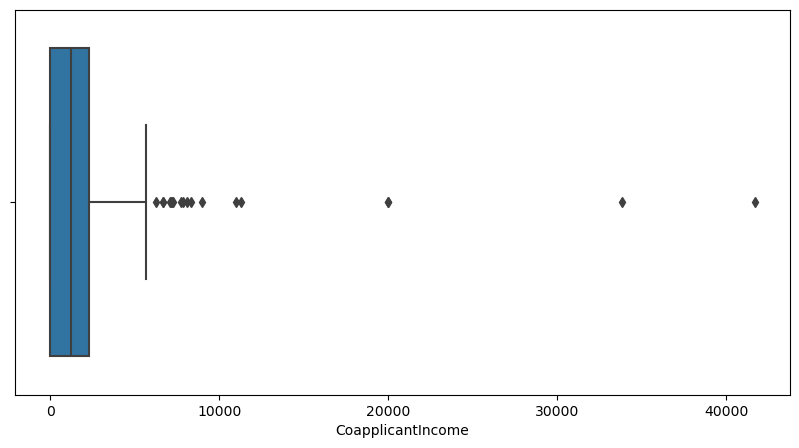

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "CoapplicantIncome", data=New_df_zscore)
plt.show()

In [41]:
Z_score = (New_df_zscore["CoapplicantIncome"] - New_df_zscore["CoapplicantIncome"].mean())/(New_df_zscore["CoapplicantIncome"].std())

In [54]:
Z_score<3

0      True
1      True
2      True
3      True
4      True
       ... 
609    True
610    True
611    True
612    True
613    True
Name: CoapplicantIncome, Length: 612, dtype: bool

In [38]:
New_df_zscore["Z_score"] = Z_score

In [55]:
New_df_zscore[New_df_zscore["Z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Z_score
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y,-0.554538
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N,-0.039897
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y,-0.554538
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y,0.250185
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y,-0.554538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y,-0.554538
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y,-0.554538
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y,-0.472632
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y,-0.554538


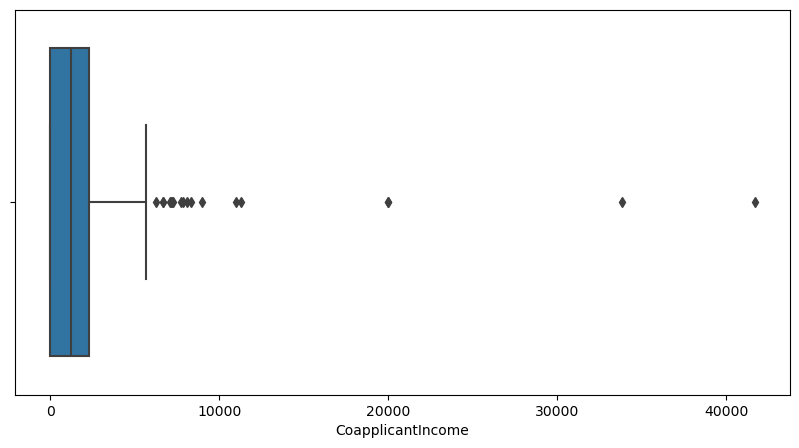

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "CoapplicantIncome", data=New_df_zscore)
plt.show()

In [57]:
New_df_zscore.shape

(612, 14)